In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15            
matplotlib.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('drinks.csv')

In [ ]:
### 대륙별 total_servings 컬럼을 추가해서
### 대륙별 total_servings 원 그래프로 출력하시오.

In [ ]:
df['continent'].fillna('OT',inplace=True)

In [ ]:
df.head()

In [ ]:
df['total_servings'] = df['beer_servings'] + df['spirit_servings'] + df['wine_servings']

In [ ]:
## 대륙별 나라 개수
df['continent'].value_counts()

In [ ]:
## 대륙별 술 총 소비량
c_df = df.groupby('continent')['total_servings'].sum()

In [ ]:
df['continent'].unique() ## 순서가 달라 쓸수없음

In [ ]:
plt.title('대륙별 술 소비량')
colors = ['plum', 'beige', 'skyblue', 'bisque', 'khaki', 'peachpuff']
wedgeprops = {'width':0.6, 'edgecolor':'white', 'linewidth':2}
plt.pie(c_df, labels=c_df.index, colors=colors, autopct='%.1f%%', startangle=90, counterclock=False, wedgeprops=wedgeprops, pctdistance=0.7)

plt.legend(loc=(1.0, 0.2), title = '술 소비량')
plt.show()

In [ ]:
## total_liters_of_pure_alcphpl
## 전체 평균보다 많은 알코올 도수를 섭취하는 대륙을 출력하시오.

# 1. 전체 평균 도수 구하기
data = df['total_litres_of_pure_alcohol'].mean()
# 2. 대륙별 도수 평균 구하기
total_df = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
# 3. 필터 구하기
filt = total_df > data
# 4. 필터 적용해서 출력
filt
total_df[filt]

In [ ]:
## 평균 beer_servings가 가장 높은 대륙 출력
df.groupby('continent')['beer_servings'].mean().max() # index에 해당하는 value값
df.groupby('continent')['beer_servings'].mean().idxmax() # index가 출력

## 대륙별 beer_servings 높은 순서대로 출력
df.groupby('continent')['beer_servings'].mean().sort_values(ascending=False)

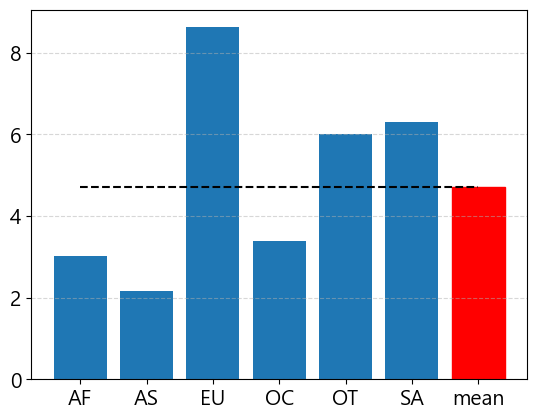

In [259]:
## 대륙별 total_litres_of_pure_alcohol 막대그래프로 출력
## 마지막에는 평균 막대그래프를 출력하시오

# 1. 대륙별 total_litres_of_pure_alcohol 구하기
data = df['total_litres_of_pure_alcohol'].mean()
n_data = [data]*6
# 2. 대륙별 평균 구하기
con_df = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
# 3. 컬럼에 대륙별 평균을 더하기
con_df['mean'] = data


# 4. 막대그래프 출력
con_bar = plt.bar(con_df.index,con_df)
plt.plot(con_df.index,[data]*7, ls='--', color='black')
plt.grid(axis='y', ls='--', alpha=0.5) # 격자선
# plt.bar(con_df.index,con_df)
con_bar[len(con_df)-1].set_color('red')

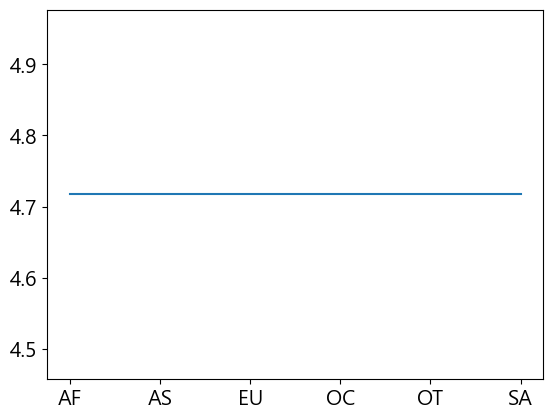

In [251]:
x = total_df.index
y = [data]*6

plt.plot(x,y)